# Biodiversity in U.S. National Parks

## North American Birds of Prey

### Data has been cleaned in `wrangling.ipynb`

In [21]:
# Importing the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns
import numpy as np

## Loading in .csv files

### `sw_birds.csv`

In [22]:
birds_df = pd.read_csv('csv_files/sw_birds.csv')
birds_df.rename(columns={'Unnamed: 0': 'prev_index'}, inplace=True)
print(f"Shape of DF: {birds_df.shape}\n")
birds_df.head()

Shape of DF: (6746, 9)



,prev_index,park_code,park_name,family,scientific_name,common_names,conservation_status,protected,raptor
0,42081,GRCA,Grand Canyon National Park,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk
1,42082,GRCA,Grand Canyon National Park,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk
2,42083,GRCA,Grand Canyon National Park,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk
3,42084,GRCA,Grand Canyon National Park,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle
4,42085,GRCA,Grand Canyon National Park,Accipitridae,Buteo albonotatus,Zone Tailed Hawk,Least Concern,False,Hawk


In [23]:
# Fill the 'NaN' values with 'Not Raptor'
birds_df['raptor'].fillna('Not Raptor', inplace=True)

### `sw_data.csv`

In [24]:
parks_df = pd.read_csv('csv_files/sw_data.csv')
print(f"Shape of DF: {parks_df.shape}\n")
parks_df.head()

Shape of DF: (24, 6)



,park_code,park_name,state,latitude,longitude,hectares
0,GRCA,Grand Canyon,AZ,36.06,-112.14,492665.95
1,PEFO,Petrified Forest,AZ,35.07,-109.78,37851.50
2,SAGU,Saguaro,AZ,32.25,-110.50,37004.49
3,CHIS,Channel Islands,CA,34.01,-119.42,100993.84
4,DEVA,Death Valley,CA,36.24,-116.82,1918580.71


### `sw_extras.csv`

Extra columns may/may not need

In [25]:
extras_df = pd.read_csv('csv_files/sw_extras.csv')
extras_df.rename(columns={'Unnamed: 0': 'prev_index'}, inplace=True)
extras_df.head()

,prev_index,scientific_name,common_names,occurrence,nativeness,abundance,seasonality
0,42081,Accipiter cooperii,Cooper's Hawk,Present,Native,Common,Breeder
1,42082,Accipiter gentilis,Northern Goshawk,Present,Native,Common,Breeder
2,42083,Accipiter striatus,Sharp-Shinned Hawk,Present,Native,Common,Breeder
3,42084,Aquila chrysaetos,Golden Eagle,Present,Native,Uncommon,Breeder
4,42085,Buteo albonotatus,Zone-Tailed Hawk,Present,Native,Common,Breeder


## - `birds_df` and `extras_df` have the same index $\in$ `prev_index`

----
&nbsp;
## DataFrame merges



----
#### 1. DataFrame `sw_birds_df` from;
- `birds_df`
- `parks_df`

Aim to retain as much data as possible, using an inner merge.

In [26]:
# inner merge to retain all data
sw_birds_df = pd.merge(birds_df, parks_df, on='park_code', how='inner')

print(f"\nwith shape: {sw_birds_df.shape}")


with shape: (6746, 14)


Delete newly created column `park_name_x` and change `park_name_y` to `park_name`

In [27]:
sw_birds_df.drop(columns=['park_name_x'], axis=1, inplace=True)
sw_birds_df.rename(columns={'park_name_y': 'park_name'}, inplace=True)
sw_birds_df.head(10)

,prev_index,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares
0,42081,GRCA,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
1,42082,GRCA,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
2,42083,GRCA,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
3,42084,GRCA,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle,Grand Canyon,AZ,36.06,-112.14,492665.95
4,42085,GRCA,Accipitridae,Buteo albonotatus,Zone Tailed Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
5,42086,GRCA,Accipitridae,Buteo jamaicensis,Red Tailed Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
6,42087,GRCA,Accipitridae,Buteo lagopus,Rough Legged Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
7,42088,GRCA,Accipitridae,Buteo lineatus,Red Shouldered Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
8,42089,GRCA,Accipitridae,Buteo platypterus,Broad Winged Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
9,42090,GRCA,Accipitridae,Buteo regalis,Ferruginous Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95


----
#### 2. DataFrame `sw_birds_all_df` from;
- `sw_birds_df`
- `extras_df`

Aim to retain as much data as possible, using an inner merge.
- replace columns in `extras_df`
- Will ultimately retain `scientific_name` and `common_names` from `birds_df`

In [28]:
extras_df = extras_df.rename(columns={'scientific_name': 'sci_loose', 'common_names': 'com_loose'})

In [29]:
# inner merge to retain all data
sw_birds_all_df = pd.merge(sw_birds_df, extras_df, on='prev_index', how='inner')

print(f"\nwith shape: {sw_birds_all_df.shape}")


with shape: (6746, 19)


----
Delete columns

- `prev_index` in `sw_birds_df`
- `prev_index`, `sci_loose` & `com_loose` from `sw_birds_all_df`

DataFrames are merged in correct position with new indexes created

In [30]:
sw_birds_df.drop(columns=['prev_index'], axis=1, inplace=True)
sw_birds_all_df.drop(columns=['prev_index', 'sci_loose', 'com_loose'], axis=1, inplace=True)

In [31]:
print(f"\nsw_birds_df shape: {sw_birds_df.shape}")
sw_birds_df.head()


sw_birds_df shape: (6746, 12)


,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares
0,GRCA,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
1,GRCA,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
2,GRCA,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
3,GRCA,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle,Grand Canyon,AZ,36.06,-112.14,492665.95
4,GRCA,Accipitridae,Buteo albonotatus,Zone Tailed Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95


We have retained `sw_birds_all_df` which is the meta DataFrame for (possible) use at a later date

In [32]:
meta_df_cols = sw_birds_all_df.columns.tolist()
print(f"\nsw_birds_all_df shape: {sw_birds_all_df.shape}\n")
print(f"With columns; \n{meta_df_cols}")


sw_birds_all_df shape: (6746, 16)

With columns; 
['park_code', 'family', 'scientific_name', 'common_names', 'conservation_status', 'protected', 'raptor', 'park_name', 'state', 'latitude', 'longitude', 'hectares', 'occurrence', 'nativeness', 'abundance', 'seasonality']


----
# Analysis


### `sw_birds_df` inspection



In [33]:
sw_parks_list = sw_birds_df['park_name'].unique().tolist()
print(f"We have {len(sw_parks_list)} parks: \n\n{sw_parks_list}")

We have 24 parks: 

['Grand Canyon', 'Petrified Forest', 'Saguaro', 'Channel Islands', 'Death Valley', 'Joshua Tree', 'Lassen Volcanic', 'Pinnacles', 'Redwood', 'Sequoia & Kings Canyon', 'Yosemite', 'Black Canyon of the Gunnison', 'Great Sand Dunes', 'Mesa Verde', 'Rocky Mountain', 'Great Basin', 'Carlsbad Caverns', 'Big Bend', 'Guadalupe Mountains', 'Arches', 'Bryce Canyon', 'Canyonlands', 'Capitol Reef', 'Zion']


<img src="Images/Area_Baja.png"/>

In [34]:
states_list = sw_birds_df['state'].unique().tolist()
states_list = sorted(states_list)
print(f"We have {len(states_list)} states: \n\n{states_list}")

We have 7 states: 

['AZ', 'CA', 'CO', 'NM', 'NV', 'TX', 'UT']


Create separate Dataframes for each state $\in$ `states_list`.

We iterate through `states_list` to produce summary statistics of the categorical data

In [35]:
d = {}
for state in states_list:
    d[state] = pd.DataFrame(sw_birds_df[sw_birds_df['state'] == state])

for i in range(0, len(states_list)):
    print(f"\n\n{states_list[i]}:\nShape: {d[states_list[i]].shape}")
    categorical_cols = d[states_list[i]].select_dtypes(include=['object']).columns
    print(f"Summary statistics:\n{d[states_list[i]][categorical_cols].describe().transpose()}")



AZ:
Shape: (872, 12)
Summary statistics:
                    count unique                 top freq
park_code             872      3                GRCA  383
family                872     61         Emberizidae   80
scientific_name       872    463  Accipiter cooperii    3
common_names          872    469       Cooper's Hawk    3
conservation_status   872      6       Least Concern  693
raptor                872     12          Not Raptor  783
park_name             872      3        Grand Canyon  383
state                 872      1                  AZ  872


CA:
Shape: (2461, 12)
Summary statistics:
                    count unique                 top  freq
park_code            2461      8                DEVA   460
family               2461     72           Parulidae   208
scientific_name      2461    677  Accipiter cooperii     8
common_names         2461    676       Cooper's Hawk     8
conservation_status  2461      6       Least Concern  1985
raptor               2461     12     

California has the largest representation in `sw_birds_df`

In [36]:
# We can call DataFrames for each state using below syntax
# For Example, California:
d['CA'].head()

,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares
872,CHIS,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk,Channel Islands,CA,34.01,-119.42,100993.84
873,CHIS,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk,Channel Islands,CA,34.01,-119.42,100993.84
874,CHIS,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk,Channel Islands,CA,34.01,-119.42,100993.84
875,CHIS,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle,Channel Islands,CA,34.01,-119.42,100993.84
876,CHIS,Accipitridae,Buteo jamaicensis,Red Tailed Hawk,Least Concern,False,Hawk,Channel Islands,CA,34.01,-119.42,100993.84


Need to double-check rows where `common_names` is 'None'. These will be removed from the dataset

In [37]:
com_name_none = sw_birds_df[sw_birds_df['common_names'] == 'None']
com_name_none_grouped = com_name_none.groupby('state').size().reset_index(name='count')

for state in states_list:
    state_rows = com_name_none_grouped[com_name_none_grouped['state'] == state]
    if len(state_rows) > 0:
        print(f"State: {state}, None Count: {state_rows['count'].values[0]}")

State: AZ, None Count: 2
State: CA, None Count: 3
State: CO, None Count: 2
State: NV, None Count: 1


In [38]:
com_name_none.head(10)

,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares
249,GRCA,Parulidae,Leiothlypis celata orestera,None,Least Concern,False,Not Raptor,Grand Canyon,AZ,36.06,-112.14,492665.95
844,SAGU,Picidae,Colaptes auratus cafer,None,Least Concern,False,Not Raptor,Saguaro,AZ,32.25,-110.50,37004.49
1230,DEVA,Paridae,Parus inornatus griseus,None,Least Concern,False,Not Raptor,Death Valley,CA,36.24,-116.82,1918580.71
1764,JOTR,Scolopacidae,Tringa semipalmata,None,Least Concern,False,Not Raptor,Joshua Tree,CA,33.79,-115.90,319598.75
2401,REDW,No Data,Erolia ptilochemis,None,Least Concern,False,Not Raptor,Redwood,CA,41.30,-124.00,45532.03
3612,GRSA,Emberizidae,Junco hyemalis aikeni,None,Least Concern,False,Not Raptor,Great Sand Dunes,CO,37.73,-105.51,17395.02
4102,ROMO,Emberizidae,Junco hyemalis mearnsi,None,Least Concern,False,Not Raptor,Rocky Mountain,CO,40.40,-105.58,107576.87
4255,GRBA,Fringillidae,Carduelis pinus vagans,None,Least Concern,False,Not Raptor,Great Basin,NV,38.98,-114.30,31233.67


In [39]:
sw_birds_df = sw_birds_df[sw_birds_df['common_names'] != 'None'].reset_index()
sw_birds_df.drop(columns=['index'], axis=1, inplace=True)
count = sw_birds_df[sw_birds_df['common_names'] == 'None']
count

,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares


-----

# Visualising `conservation_status`

#### Defining DataFrame `sw_birds_df_two`

In [41]:
conservation_dummies = pd.get_dummies(sw_birds_df['conservation_status'])\
    .rename(columns=lambda x: x.lower().replace(' ', '_')).astype(bool)
sw_birds_df = pd.concat([sw_birds_df, conservation_dummies], axis=1)

In [42]:
parks_pro_counts_two = sw_birds_df.groupby(['state', 'park_name'])\
                                        [['least_concern', 'endangered', 'in_recovery', 'species_of_concern', 'threatened', 'under_review']].sum()\
                                        .reset_index()

percent = round((parks_pro_counts_two.endangered
                + parks_pro_counts_two.in_recovery
                + parks_pro_counts_two.species_of_concern
                + parks_pro_counts_two.threatened
                + parks_pro_counts_two.under_review) / (parks_pro_counts_two.endangered
                                                        + parks_pro_counts_two.in_recovery
                                                        + parks_pro_counts_two.least_concern
                                                        + parks_pro_counts_two.species_of_concern
                                                        + parks_pro_counts_two.threatened
                                                        + parks_pro_counts_two.under_review)
                                                        * 100, 2)
parks_pro_counts_two['percent_protected'] = percent

parks_pro_counts_two.head()

,state,park_name,least_concern,endangered,in_recovery,species_of_concern,threatened,under_review,percent_protected
0,AZ,Grand Canyon,310,3,3,63,2,1,18.85
1,AZ,Petrified Forest,190,0,2,51,1,0,22.13
2,AZ,Saguaro,191,0,0,51,2,0,21.72
3,CA,Channel Islands,289,1,2,60,2,3,19.05
4,CA,Death Valley,386,1,2,64,2,4,15.90


#### Organise `conservation_status` so,
- 'Endangered' > 'In Recovery' > 'Threatened' > 'Under Review' > 'Species of Concern' per [IUCN](https://en.wikipedia.org/wiki/IUCN_Red_List)

Definitions
- `Endangered`: Seriously at risk of extinction
- `In Recovery`: Formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range
- `Threatened`: Vulnerable to endangerment in the near future
- `Under Review`: Population decreasing. Could be reclassified `Threatened`
- `Species of Concern`: Declining or appear to be in need of conservation

Create {key:value} dictionary of colours and `conservation_status` labels

In [43]:
cons_status_list = ['Endangered', 'In Recovery', 'Threatened', 'Under Review', 'Species of Concern', 'Least Concern']
cons_status_list = list(reversed(cons_status_list))
cons_colours = ['#bd0026','#f03b20','#fd8d3c','#fecc5c','#ffffb2', '#74c476']
cons_colours = list(reversed(cons_colours))

In [44]:
cons_colour = {}
for status in cons_status_list:
    for colour in cons_colours:
        cons_colour[status] = colour
        cons_colours.remove(colour)
        break

print(f"The resulting dictionary is: \n{cons_colour}")

The resulting dictionary is: 
{'Least Concern': '#74c476', 'Species of Concern': '#ffffb2', 'Under Review': '#fecc5c', 'Threatened': '#fd8d3c', 'In Recovery': '#f03b20', 'Endangered': '#bd0026'}


In [45]:
# Defining another shorter version
cons_status_list_two = ['Endangered', 'In Recovery', 'Threatened']
cons_colours_two = ['#bd0026','#f03b20','#fd8d3c']
cons_colour_two = {}
for status in cons_status_list_two:
    for colour in cons_colours_two:
        cons_colour_two[status] = colour
        cons_colours_two.remove(colour)
        break
print(f"The resulting dictionary is: \n{cons_colour_two}")

The resulting dictionary is: 
{'Endangered': '#bd0026', 'In Recovery': '#f03b20', 'Threatened': '#fd8d3c'}


----

### Visualisation

We plot an iteration of the `park_pro_counts_two` by `state` for those states with more than two National Parks

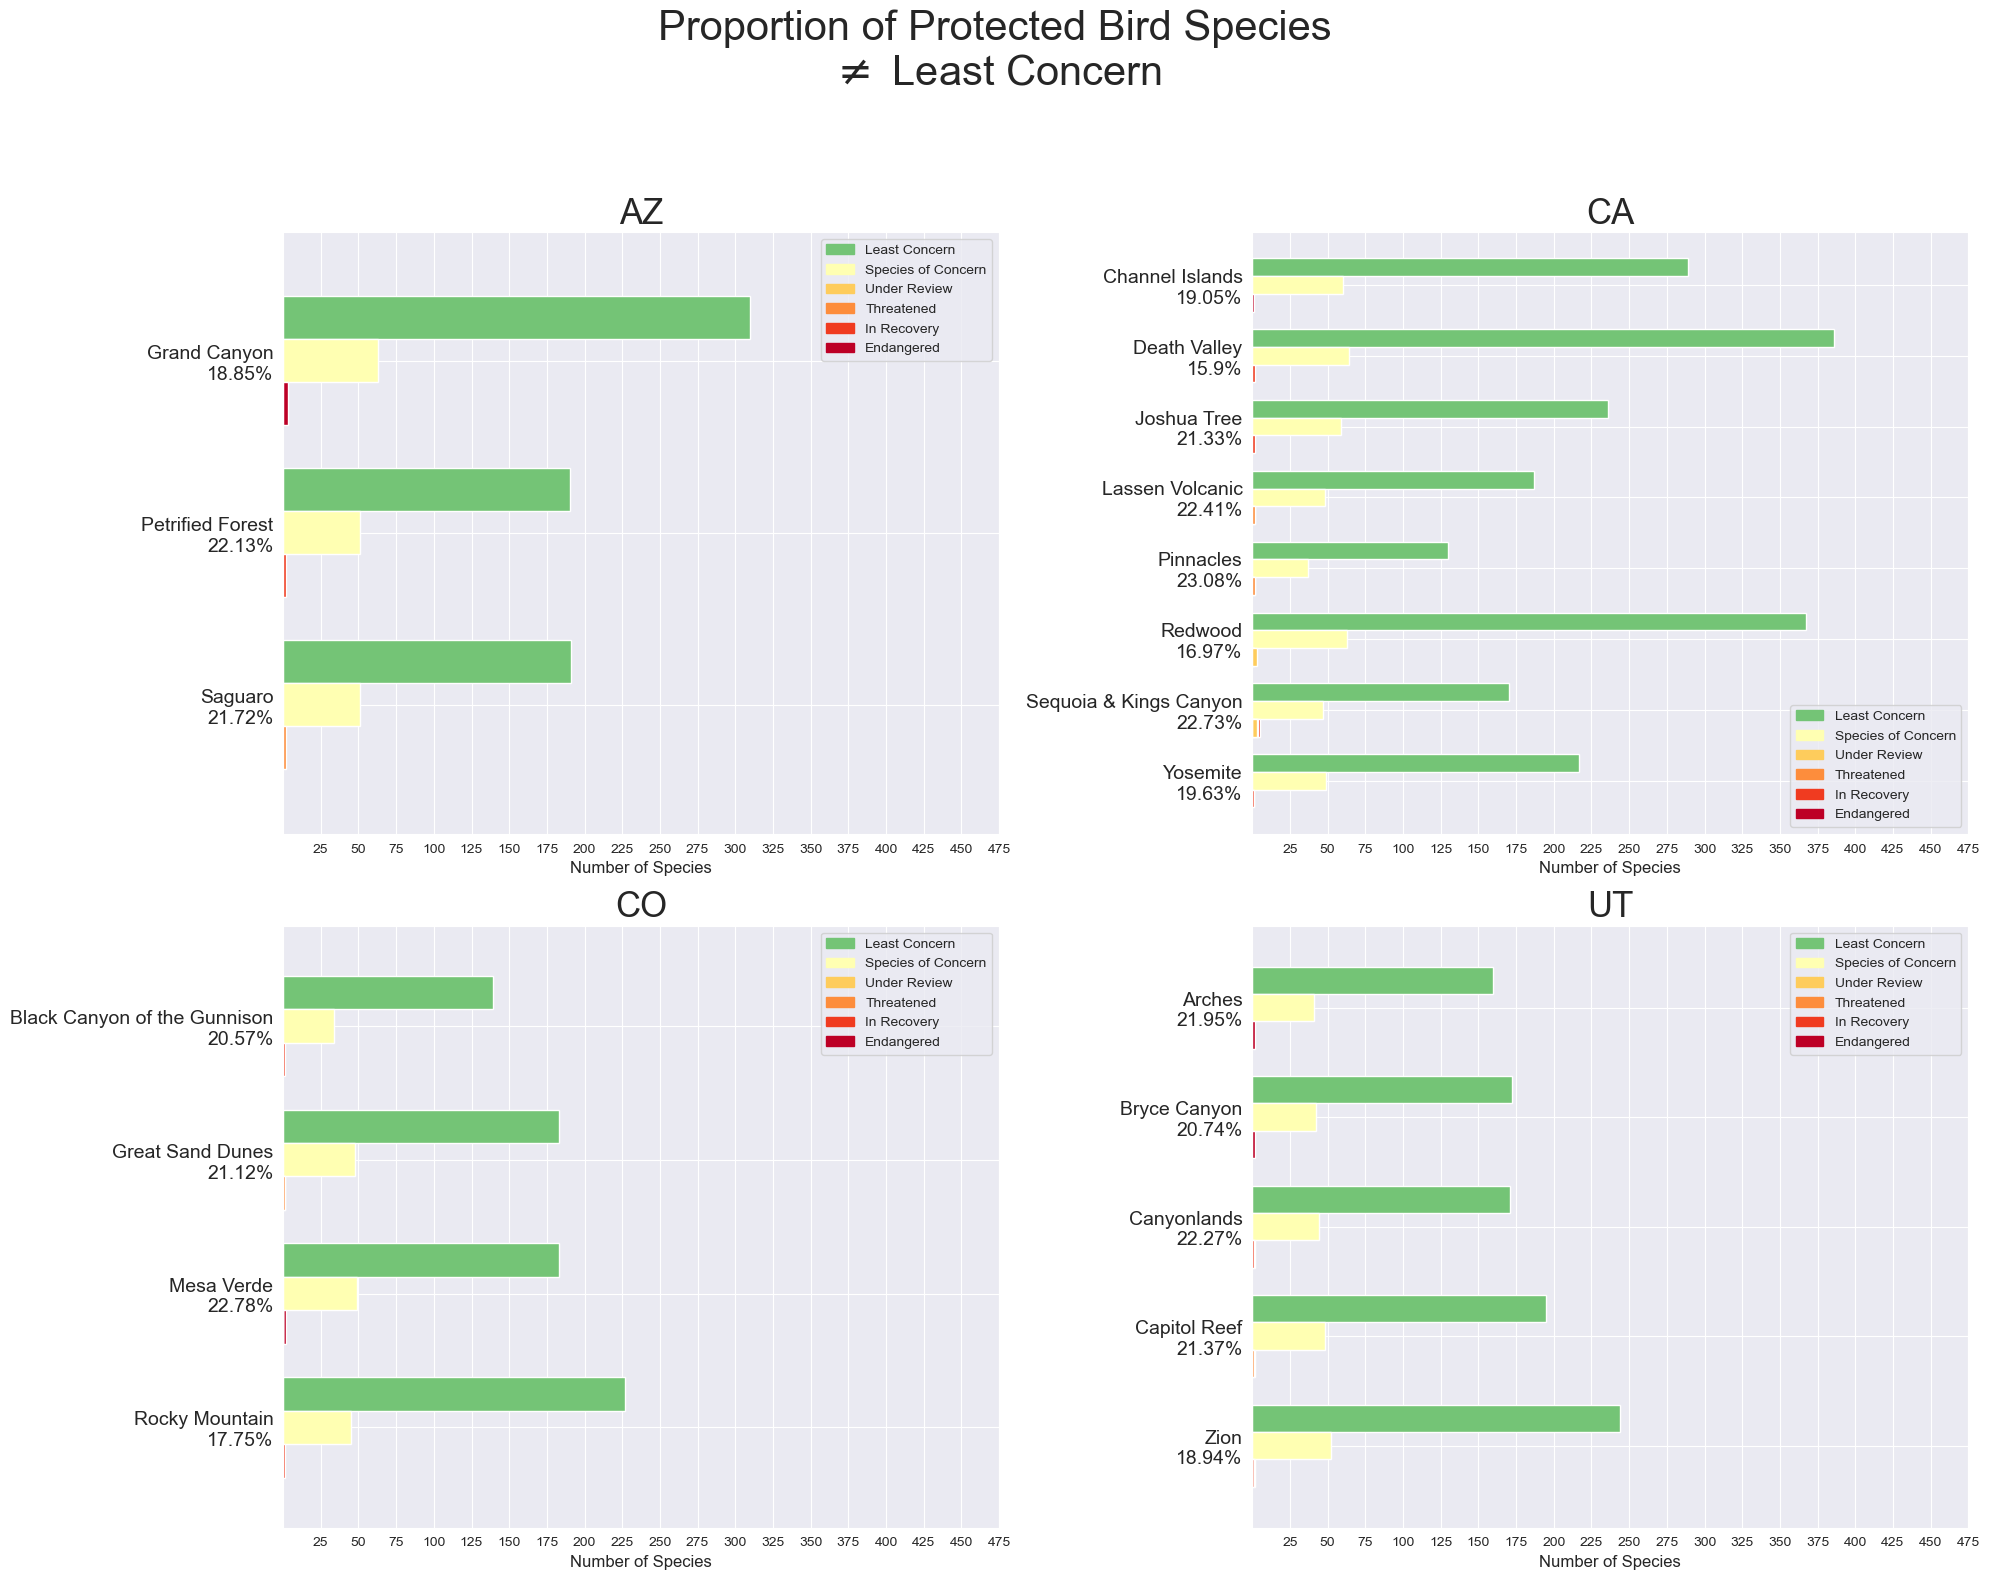

In [56]:
handles = [mpatches.Patch(color=colour, label=label) for label, colour in cons_colour.items()]
states_list_short = ['AZ', 'CA', 'CO', 'UT']

cons_colours = ['#bd0026','#f03b20','#fd8d3c','#fecc5c','#ffffb2', '#74c476']

plt.figure(figsize=(20,15))
plt.suptitle('Proportion of Protected Bird Species\n$\\neq$ Least Concern', fontsize=30, y=1.05)

for i, state in enumerate(states_list_short):
    data = pd.DataFrame(parks_pro_counts_two[parks_pro_counts_two['state'] == state])
    age_protected = data['percent_protected'].values
    ind = np.arange(len(data))
    width = 0.25
    ax = plt.subplot(2,2,(i+1))
    plt.title(state, fontsize=25)
    ax.barh(ind, data.least_concern, width, color='#74c476')
    ax.barh(ind + width, data.species_of_concern, width, color='#ffffb2')

    ax.barh(ind + 2 * width, data.endangered, width, color='#bd0026')
    height = data.endangered
    ax.barh(ind + 2 * width + height, data.in_recovery, width, color='#f03b20')
    height += data.in_recovery
    ax.barh(ind + 2 * width + height, data.threatened, width, color='#fd8d3c')
    height += data.threatened
    ax.barh(ind + 2 * width + height, data.under_review, width, color='#fecc5c')

    ax.set(yticks=ind + width, yticklabels=[f'{park}\n{age}%'
                for park, age in zip(data.park_name, age_protected)], ylim=[2*width - 1, len(data)])
    plt.yticks(rotation=0, fontsize=14)
    plt.xticks(np.arange(25,500,25))
    plt.xlabel('Number of Species', fontsize=12)
    plt.legend(handles=handles, fontsize=10)
    plt.gca().invert_yaxis() # y-axis runs from top to bottom
    plt.grid(True)

plt.subplots_adjust(top=0.5)
plt.tight_layout()
plt.show()

#### From above, we can see a very small number of bird species fall into the protected 'at risk' subset that includes;
- Endangered
- In Recovery
- Threatened

Below is a visualisation of these categories

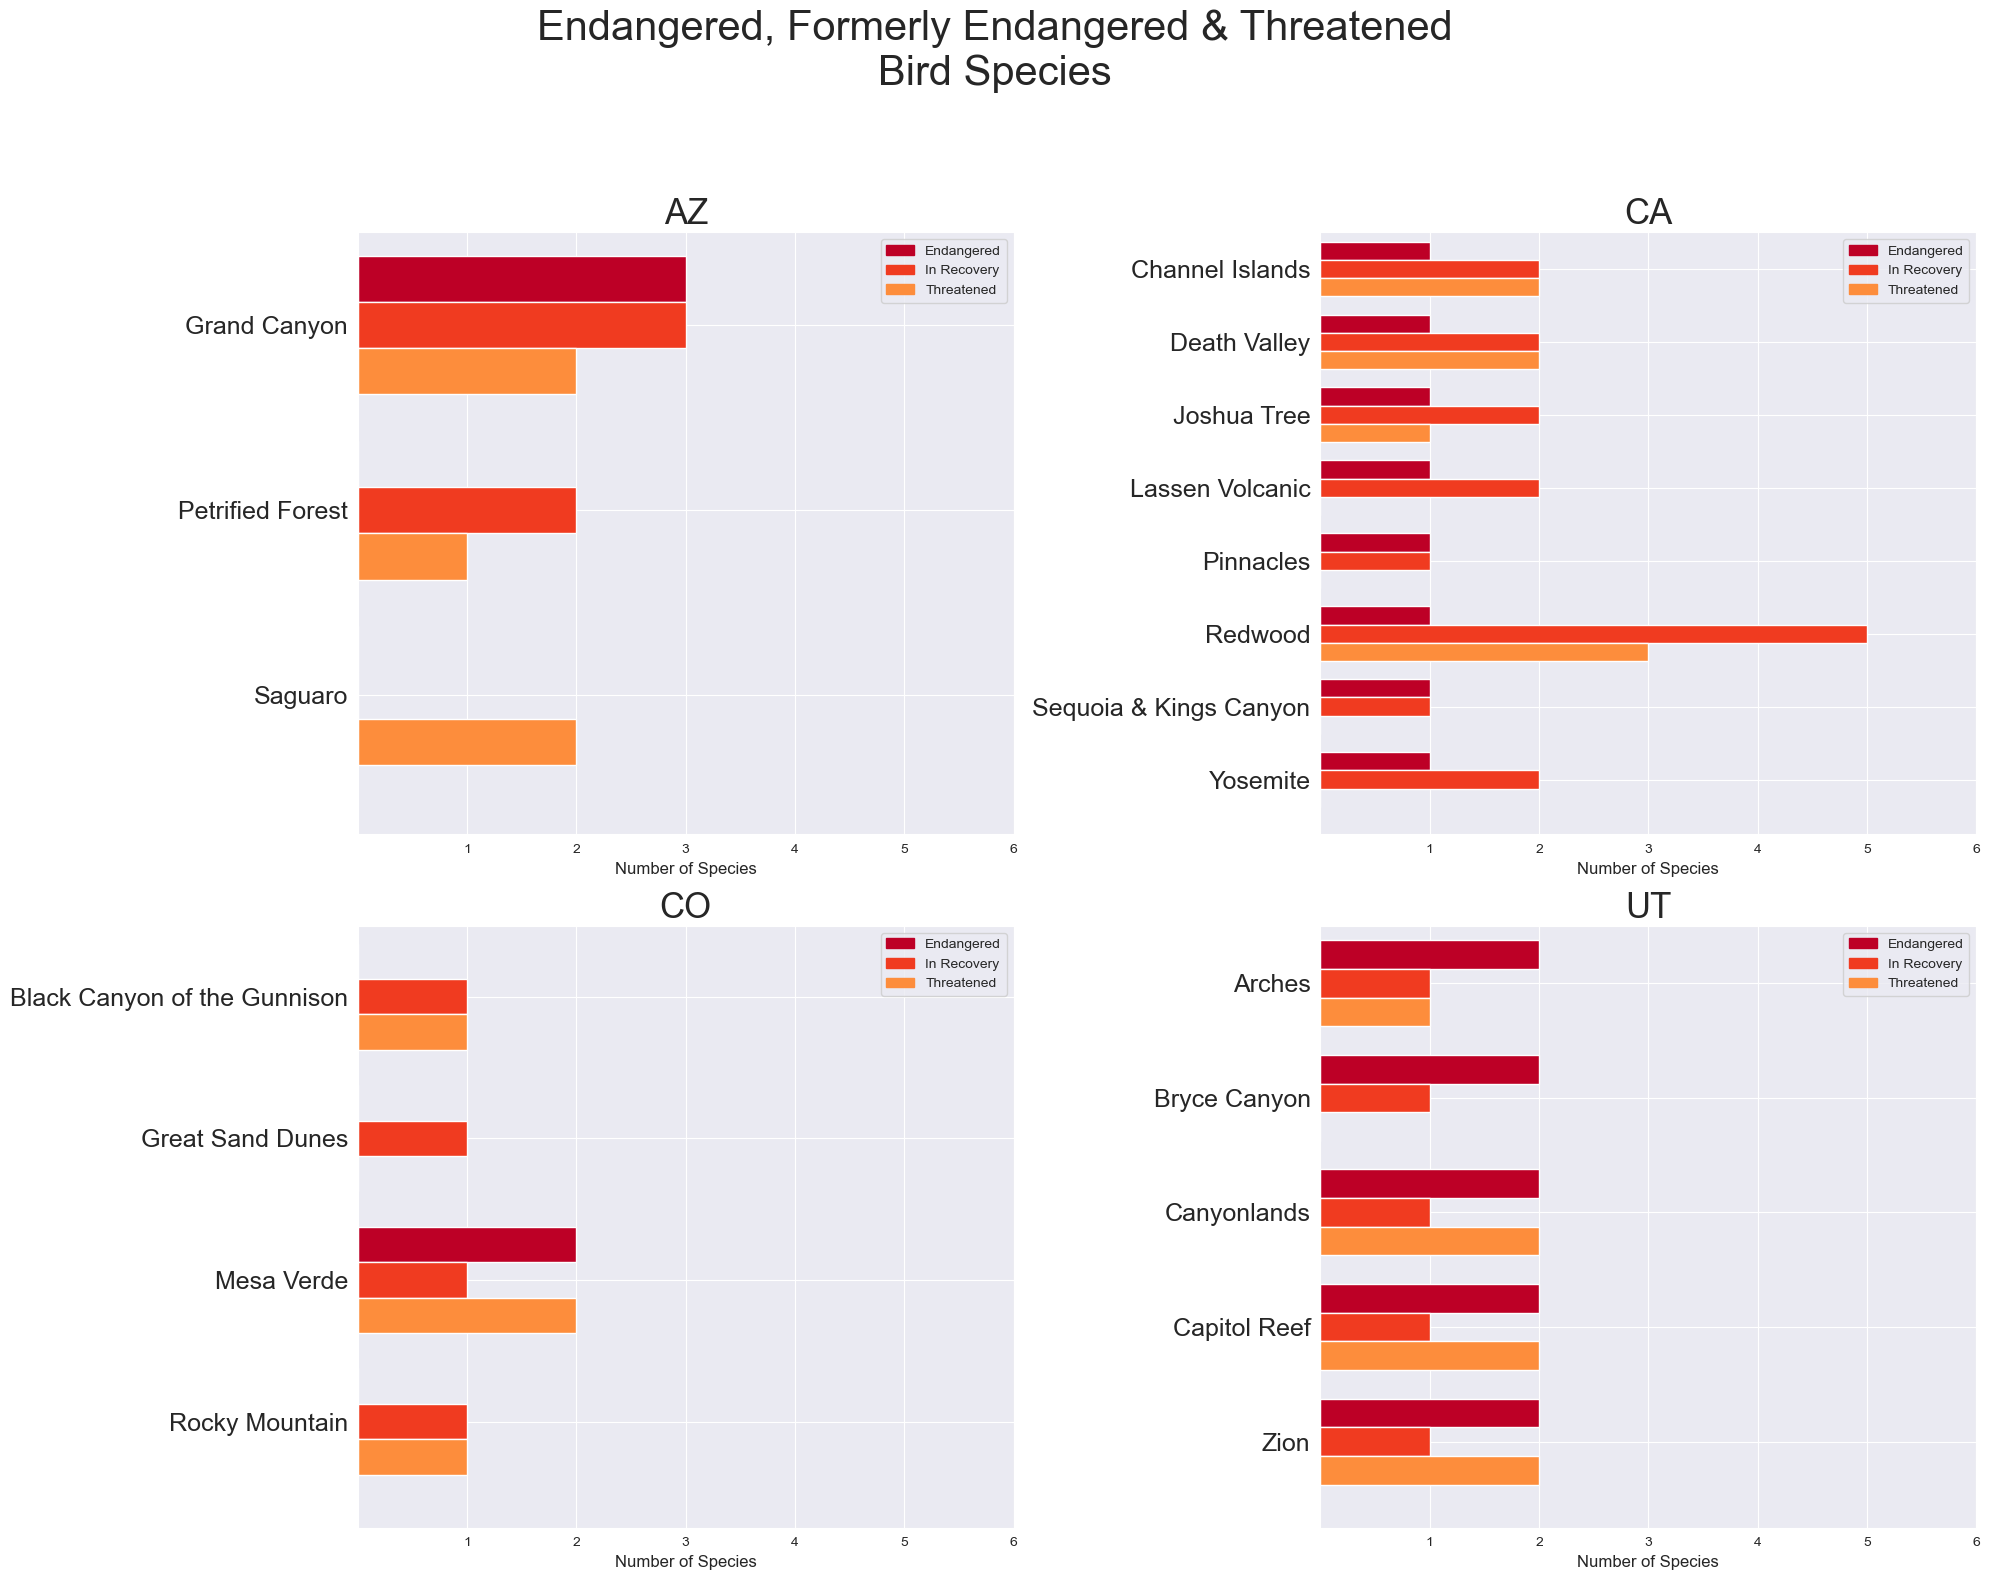

In [47]:
handles_two = [mpatches.Patch(color=colour, label=label) for label, colour in cons_colour_two.items()]

plt.figure(figsize=(20,15))
plt.suptitle('Endangered, Formerly Endangered & Threatened\nBird Species', fontsize=30, y=1.05)

for i, state in enumerate(states_list_short):
    data = pd.DataFrame(parks_pro_counts_two[parks_pro_counts_two['state'] == state])
    age_protected = data['percent_protected'].values
    ind = np.arange(len(data))
    width = 0.25
    ax = plt.subplot(2,2,(i+1))
    plt.title(state, fontsize=25)
    ax.barh(ind, data.endangered, width, color='#bd0026')
    ax.barh(ind + width, data.in_recovery, width, color='#f03b20')
    ax.barh(ind + 2*width, data.threatened, width, color='#fd8d3c')
    ax.set(yticks=ind + width, yticklabels=data.park_name, ylim=[3*width - 1, len(data)])
    plt.yticks(fontsize=18)
    plt.xticks(np.arange(1,7,1))
    plt.xlabel('Number of Species', fontsize=12)
    plt.legend(handles=handles_two, fontsize=10)
    plt.gca().invert_yaxis() # y-axis runs from top to bottom
    plt.grid(True)

plt.subplots_adjust(top=0.5)
plt.tight_layout()
plt.show()

----

----
## Visualising Park Area


'Death Valley National Park' lies partly in CA and partly in NV

In [48]:
park_area_df = sw_birds_df.groupby(['state', 'park_name'])[['hectares', 'park_code']].mean().reset_index()
park_area_df = park_area_df.sort_values(by='hectares', ascending=True)

In [49]:
# Divide the hectares column by 1000
def divide_by_1000(column):
    return round(column / 1000, 3)

park_area_df['hectares'] = park_area_df['hectares'].apply(divide_by_1000)

In [50]:
park_area_df.head()

,state,park_name,hectares
7,CA,Pinnacles,10.767
11,CO,Black Canyon of the Gunnison,13.334
20,UT,Bryce Canyon,14.502
12,CO,Great Sand Dunes,17.395
15,NM,Carlsbad Caverns,18.926


In [51]:
print(states_list)
state_colours = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69']
state_colour = {}
for state in states_list:
    for colour in state_colours:
        state_colour[state] = colour
        state_colours.remove(colour)
        break
print(f"\nThe resulting dictionary is: \n{state_colour}")

['AZ', 'CA', 'CO', 'NM', 'NV', 'TX', 'UT']

The resulting dictionary is: 
{'AZ': '#8dd3c7', 'CA': '#ffffb3', 'CO': '#bebada', 'NM': '#fb8072', 'NV': '#80b1d3', 'TX': '#fdb462', 'UT': '#b3de69'}


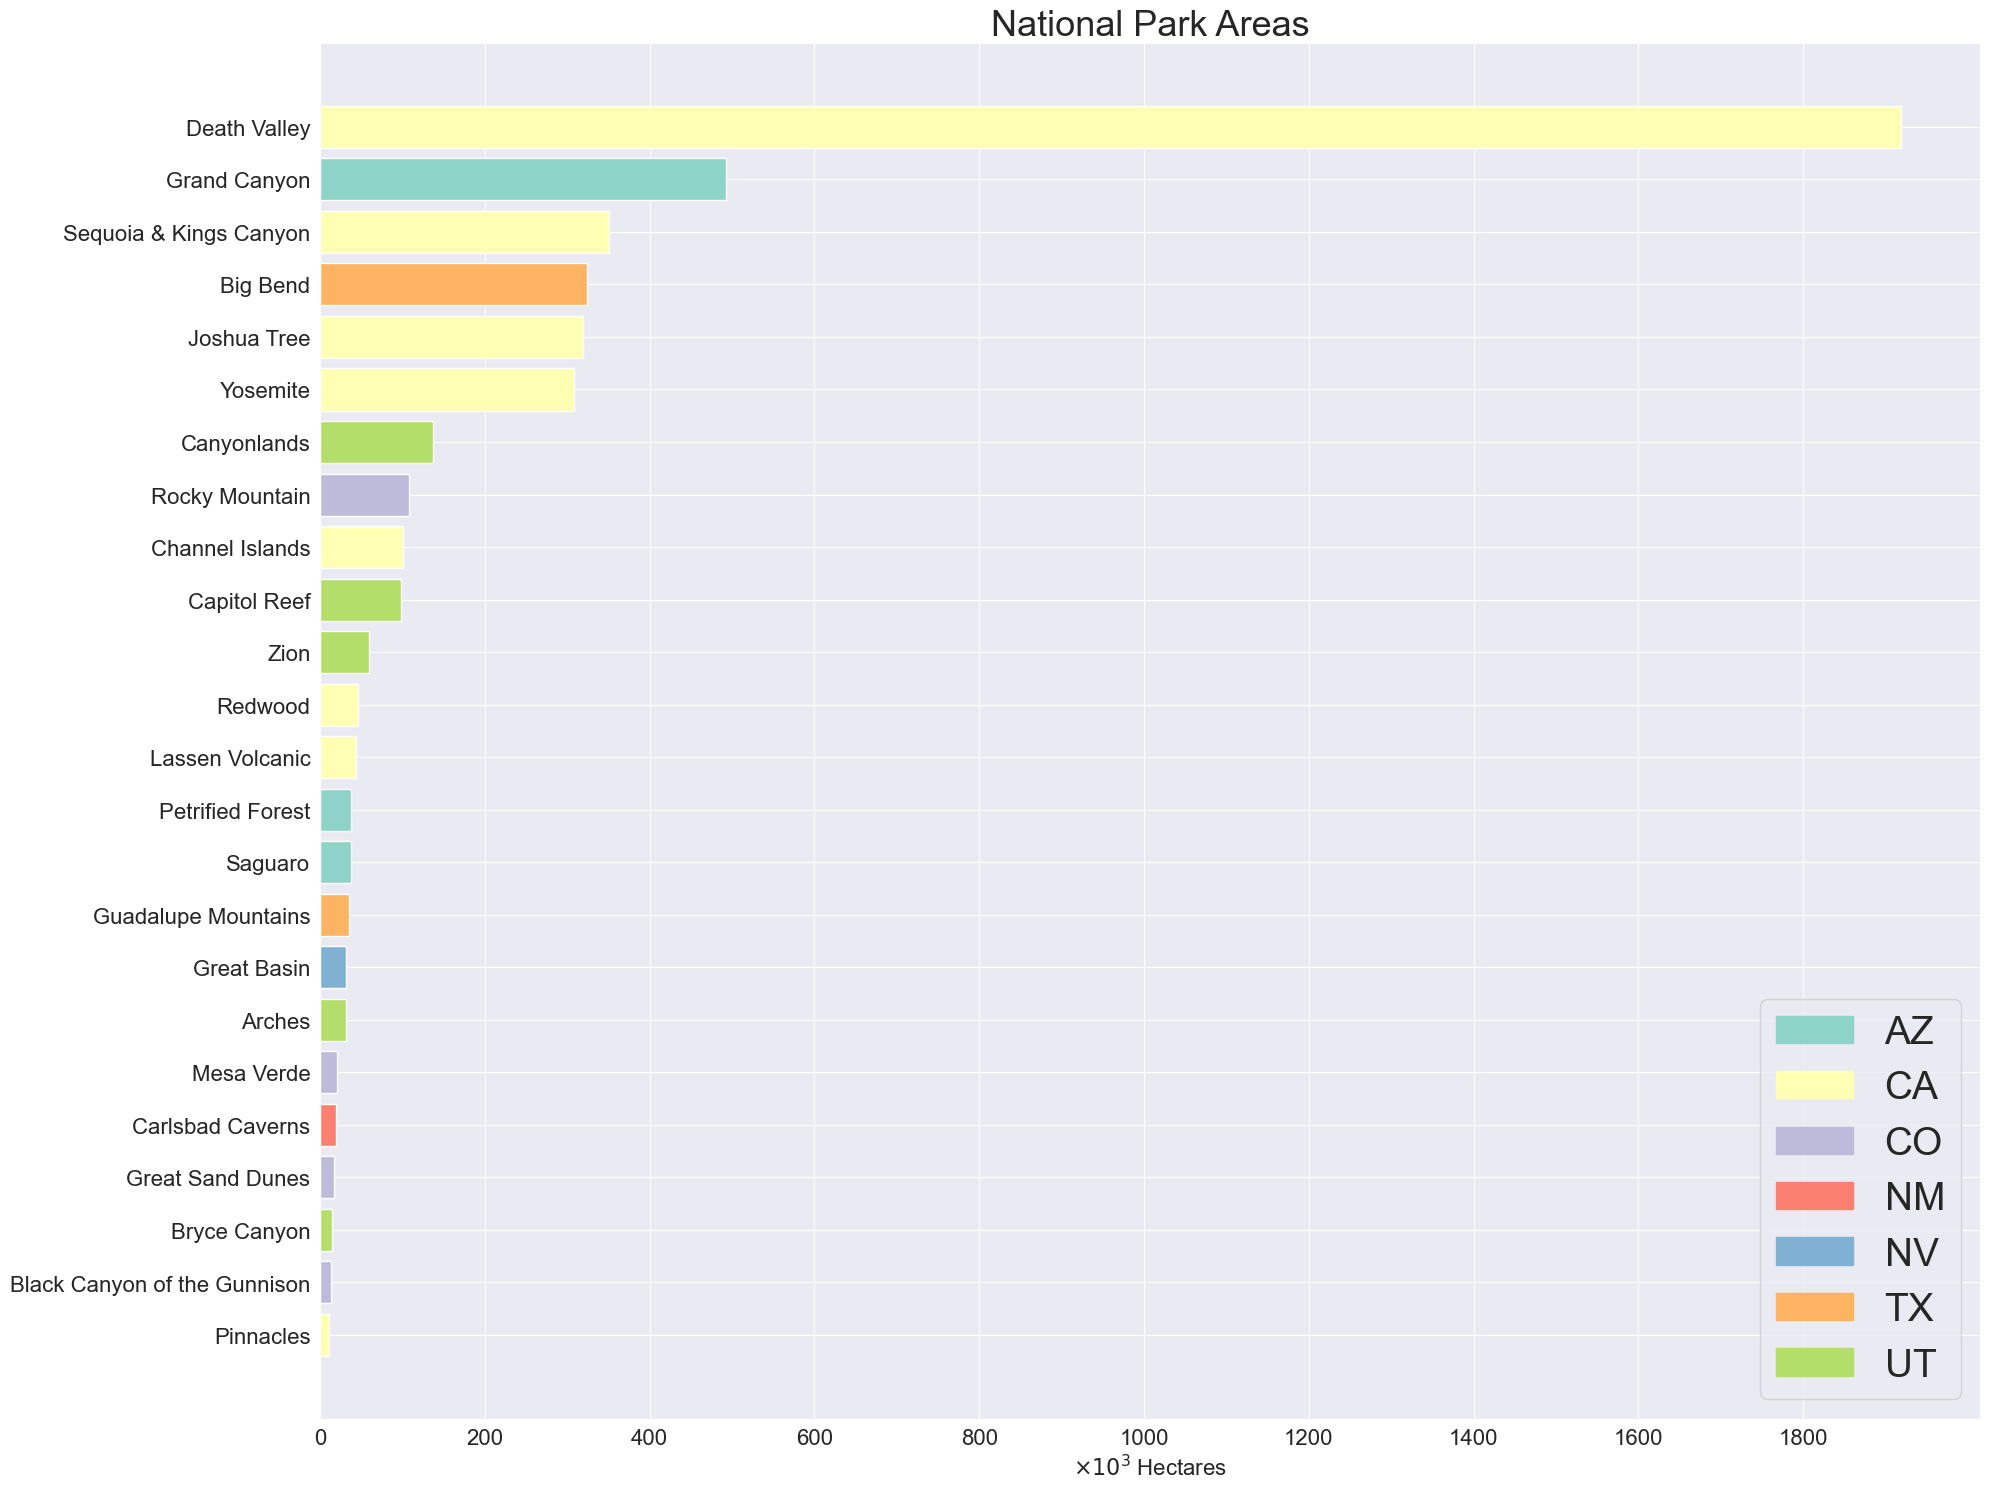

In [52]:
# legend colours
handles_three = [mpatches.Patch(color=colour, label=label) for label, colour in state_colour.items()]
# bar colours with lambda function
colour = park_area_df['state'].apply(lambda x: state_colour[x])

plt.figure(figsize=(20,15))
plt.title('National Park Areas', fontsize=26)
plt.barh(y=park_area_df.park_name, width=park_area_df.hectares, color=colour)
plt.yticks(rotation=0, fontsize=16)
plt.xticks(np.arange(0,2000,200), fontsize=16)
plt.xlabel(f'$\\times 10^{3}$ Hectares', fontsize=16)
plt.legend(handles=handles_three, fontsize=28)
plt.grid(True)

plt.tight_layout()
plt.show()

## For comparison, Greater London is $153\times 10^{3}$ Hectares

----

----
# Visualising proportion of raptors

#### Create a new boolean column `is_raptor`
- Fill values 'NaN' with 'Not Raptor'

In [53]:
sw_birds_df['is_raptor'] = sw_birds_df.raptor != 'Not Raptor'

In [54]:
parks_prey_counts = sw_birds_df.groupby(['state', 'park_name', 'is_raptor'])\
                    .common_names.nunique()\
                    .reset_index()\
                    .pivot(columns='is_raptor',
                            index=['state', 'park_name'],
                            values='common_names')\
                            .reset_index()
parks_prey_counts.columns = ['state', 'park_name', 'not_raptor', 'raptor']

percentage2 = round(parks_prey_counts.raptor / (parks_prey_counts.raptor + parks_prey_counts.not_raptor) * 100, 2)
parks_prey_counts['percentage_raptor'] = percentage2

parks_prey_counts.head()

,state,park_name,not_raptor,raptor,percentage_raptor
0,AZ,Grand Canyon,349,33,8.64
1,AZ,Petrified Forest,222,22,9.02
2,AZ,Saguaro,210,34,13.93
3,CA,Channel Islands,335,22,6.16
4,CA,Death Valley,420,39,8.50


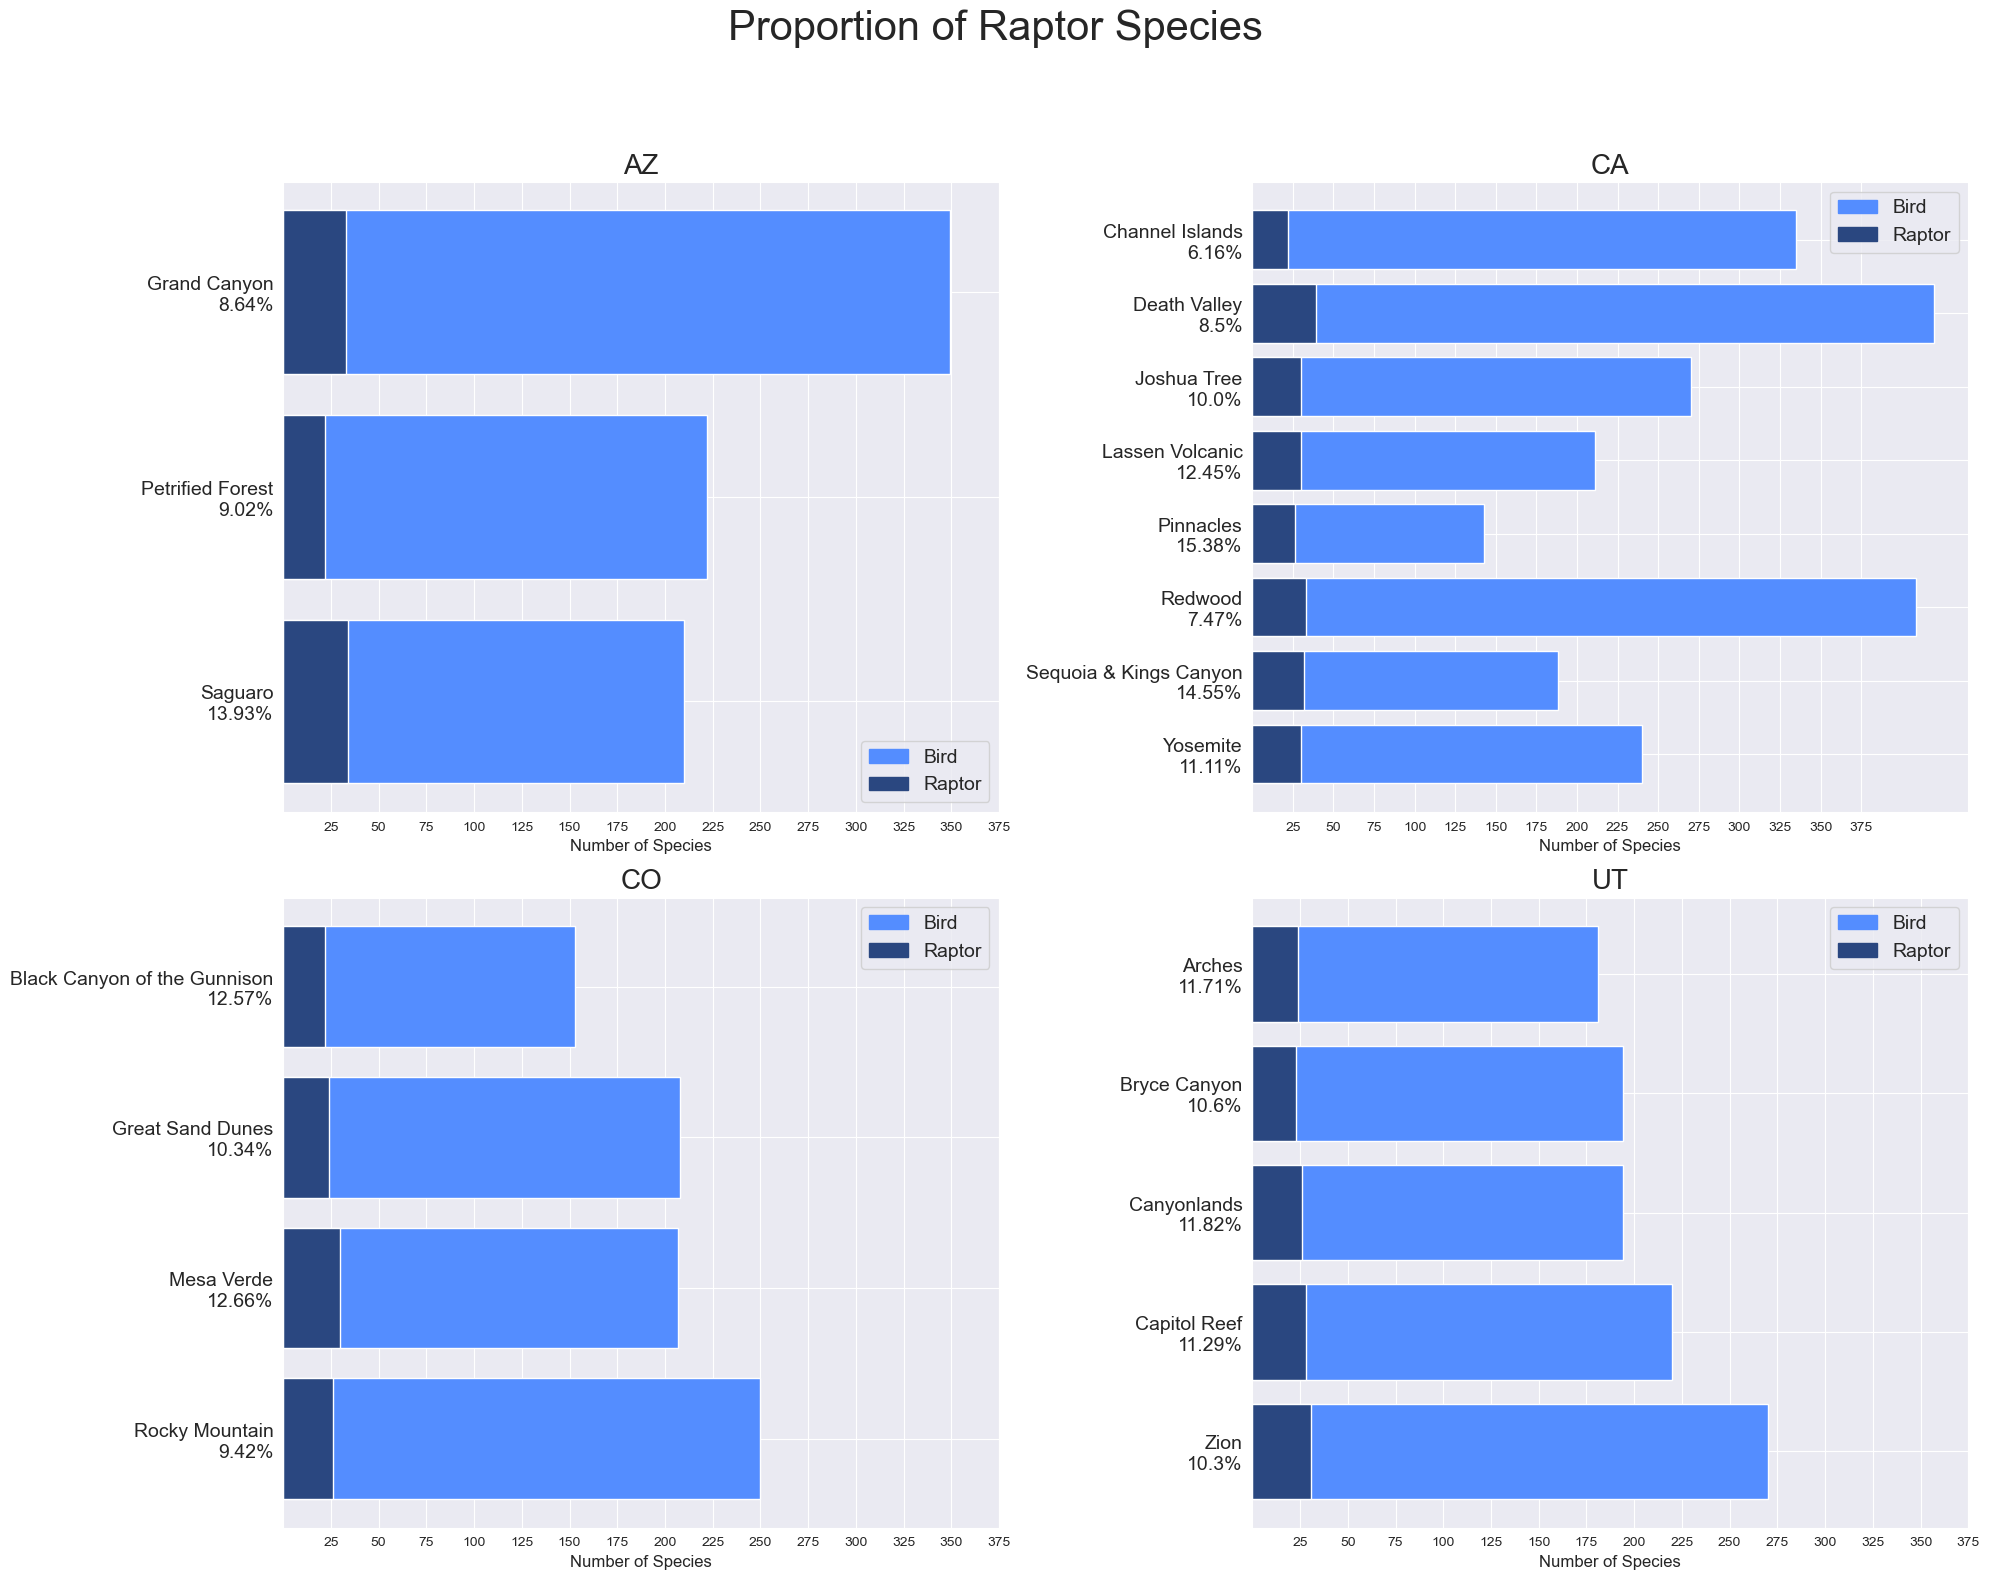

In [55]:
# Plotting only states with more than 2 National Parks.
# Defining a new states_list with above criteria
colours = {'Bird': '#548DFF', 'Raptor': '#2A4780'}
handles = [mpatches.Patch(color=colour, label=label) for label, colour in colours.items()]

plt.figure(figsize=(20,15))
plt.suptitle('Proportion of Raptor Species', fontsize=30, y=1.05)
for i, state in enumerate(states_list_short):
    data = pd.DataFrame(parks_prey_counts[parks_prey_counts['state'] == state])
    age_protected = data['percentage_raptor'].values
    plt.subplot(2,2,(i+1))
    plt.title(state, fontsize=20)
    plt.barh(y=data.park_name, width=data.not_raptor, color='#548DFF')
    plt.barh(y=data.park_name, width=data.raptor, color='#2A4780')
    #plt.yticks(rotation=0, fontsize=14)
    plt.yticks(np.arange(len(data)),
               [f'{park}\n{age}%'
                for park, age in zip(data.park_name, age_protected)],
               rotation=0, fontsize=14)
    plt.xticks(np.arange(25,400,25))
    plt.xlabel('Number of Species', fontsize=12)
    plt.legend(handles=handles, fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(True)

plt.subplots_adjust(top=0.5)
plt.tight_layout()
plt.show()

----
# Isolating Raptor Species
&nbsp;
### Raptor DataFrame `sw_raptor_df`

#### Isolate bird species where bool `is_raptor` $=$ True

In [57]:
sw_raptor_df = sw_birds_df[sw_birds_df['is_raptor'] == True]
sw_raptor_df.head()

,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares,endangered,in_recovery,least_concern,species_of_concern,threatened,under_review,is_raptor
0,GRCA,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,False,True,False,False,True
1,GRCA,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,True,False,False,False,True
2,GRCA,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,False,True,False,False,True
3,GRCA,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,False,True,False,False,True
4,GRCA,Accipitridae,Buteo albonotatus,Zone Tailed Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,True,False,False,False,True


We define separate dataframes for each state to see the distribution of the categorical data

In [60]:
raptor = {}
for state in states_list:
    raptor[state] = pd.DataFrame(sw_raptor_df[sw_raptor_df['state'] == state])

print("Raptor DataFrames by State:")

for i in range(0, len(states_list)):
    print(f"\n\n{states_list[i]}:\nShape: {raptor[states_list[i]].shape}")
    categorical_cols = raptor[states_list[i]].select_dtypes(include=['object']).columns
    print(f"Summary statistics:\n{raptor[states_list[i]][categorical_cols].describe().transpose()}")

Raptor DataFrames by State:


AZ:
Shape: (89, 19)
Summary statistics:
                    count unique                 top freq
park_code              89      3                SAGU   34
family                 89      6        Accipitridae   37
scientific_name        89     41  Accipiter cooperii    3
common_names           89     42       Cooper's Hawk    3
conservation_status    89      5       Least Concern   46
raptor                 89     11                 Owl   30
park_name              89      3             Saguaro   34
state                  89      1                  AZ   89


CA:
Shape: (242, 19)
Summary statistics:
                    count unique                 top freq
park_code             242      8                DEVA   39
family                242      6        Accipitridae  104
scientific_name       242     53  Accipiter cooperii    8
common_names          242     51       Cooper's Hawk    8
conservation_status   242      6       Least Concern  113
raptor           

----

### Print those values where `scientific_name` $\neq$ `common_names`

There's only a couple for each state so good so far!